# Модел заснован на репродукционом броју, генерацијском интервалу и утицају колективног имунитета

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Постављамо три основна параметра за модел

In [2]:
R0 = 3     # основни репродукциони број је 3 
T = 5      # просечан генерацијски интервал је 5 дана
N = 1000   # величина популације је 1000 особа

и параметре који одређују опсег у коме ћемо рачунати модел

In [3]:
c = 1      # крећемо од једног заражено, практично нултог пацијента
max_t = 70 # посматрамо првих 70 дана ширења епидемије

Параметар `delta_t` одређује густину тачака на временској оси за које ћемо рачунати вредности. 

In [4]:
delta_t = 0.1


Користимо идеју табеларног представљања функција где је једна колона независна променљива (у овом случају $t$), а остале колоне су вредности појединих функција (у овом случају $f(t)$ и $g(t)$). При томе вредности независне променљиве иду редом са одређеним кораком. Свака колона је једна серија вредности индексирана редним броје реда.

Формирајмо прво серију вредности за променљиву $t$, са кораком `delta_t`

In [5]:
t = np.arange(0, max_t + delta_t/2, delta_t) 

Серије вредности за $f(t)$ и за $g(t)$ на почетку попуњавамо нулама, а после ћемо редом да рачунамо вредности

In [6]:
f = np.zeros_like(t)
g = np.zeros_like(t)

Параметар `T` преводимо у одговарајући цео број корака дужине `delta_t`, уз заокруживање

In [7]:
iT = int(round(T/delta_t))

Дефинишемо проширену функцију која за вредности мање од нуле користи експоненцијалну функцију са одговарајућим параметрим

In [8]:
 def f_prosireno(i):
    if i >= 0:
        return f[i]
    else:
        r = R0 ** (1 / (iT * delta_t)) 
        return c * r ** (i * delta_t)

У следећој петљи нумерички конструишемо решење једначине

$$f(t) = R_0(1-{g(t)\over N})f(t-T)$$

уз услов да је су функције $f(t)$ и $g(t)$ таквом односу да да ако $f(t)$ представља број новозаражених у јединици времена онда $g(t)$ представља укупан број заражених, као и уз коришћење апроксимације експоненцијалном функциом за вредности мање од нуле.

In [9]:
for i in range(len(t)):
    if i==0:
        g[i] = 0 
    else:
        g[i] = g[i-1] + f[i-1] * delta_t
        
    f[i] = R0 * (1 - g[i] / N) * f_prosireno(i - iT)

На крају ћемо да нацртано графике функција

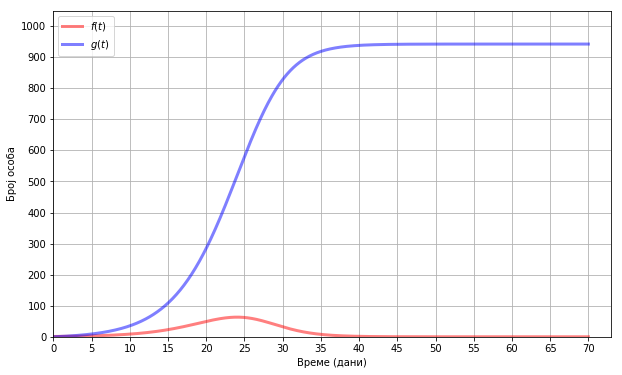

In [10]:
plt.figure(figsize=(10,6))
plt.plot(t,f, 'red', alpha=0.5, lw=3, label='$f(t)$')
plt.plot(t,g, 'blue', alpha=0.5, lw=3, label='$g(t)$')
plt.legend()
plt.grid(True)
plt.xlabel('Време (дани)')
plt.ylabel('Број особа')
plt.ylim(0,1050)
plt.yticks(np.arange(0,1050,100))
plt.xlim(0,73)
plt.xticks(np.arange(0,73,5))
plt.show()